# Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

## Loading required libraries

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Loading required datasets

In [2]:
# getting present working directory
pwd = os.getcwd()

In [3]:
transaction_data = pd.read_excel(pwd + '\\QVI_transaction_data.xlsx')

In [4]:
customer_data = pd.read_csv(pwd + '\\QVI_purchase_behaviour.csv')

## Exploratory data analysis

### Examining transaction data

In [5]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Let's check if columns we would expect to be numeric are in numeric form and date columns are in date format. 

In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We can see that the date column is in an integer format. Let's change this to a date format.

In [7]:
base_date = pd.Timestamp('30-12-1899')
transaction_data.DATE = transaction_data.DATE.apply(lambda x: base_date + pd.DateOffset(x))

We should check that we are looking at the right products by examining PROD_NAME.

In [8]:
transaction_data.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Looks like we are definitely looking at potato chips but how can we check that these are all chips? We can do some basic text analysis by summarising the individual words in the product name

In [9]:
# Making a list of all the words in product names
product_words = []
def add_words(lst):
    for y in lst:
        product_words.append(y)
    return
product_words1 = transaction_data.PROD_NAME.apply(lambda x: add_words(x.split()))
product_words

['Natural',
 'Chip',
 'Compny',
 'SeaSalt175g',
 'CCs',
 'Nacho',
 'Cheese',
 '175g',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips',
 'Chicken',
 '170g',
 'Smiths',
 'Chip',
 'Thinly',
 'S/Cream&Onion',
 '175g',
 'Kettle',
 'Tortilla',
 'ChpsHny&Jlpno',
 'Chili',
 '150g',
 'Old',
 'El',
 'Paso',
 'Salsa',
 'Dip',
 'Tomato',
 'Mild',
 '300g',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 '&',
 'Vinegar',
 '330g',
 'Grain',
 'Waves',
 'Sweet',
 'Chilli',
 '210g',
 'Doritos',
 'Corn',
 'Chip',
 'Mexican',
 'Jalapeno',
 '150g',
 'Grain',
 'Waves',
 'Sour',
 'Cream&Chives',
 '210G',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 '&',
 'Vinegar',
 '330g',
 'Kettle',
 'Sensations',
 'Siracha',
 'Lime',
 '150g',
 'Twisties',
 'Cheese',
 '270g',
 'WW',
 'Crinkle',
 'Cut',
 'Chicken',
 '175g',
 'Thins',
 'Chips',
 'Light&',
 'Tangy',
 '175g',
 'CCs',
 'Original',
 '175g',
 'Burger',
 'Rings',
 '220g',
 'NCC',
 'Sour',
 'Cream',
 '&',
 'Garden',
 'Chives',
 '175g',
 'Doritos',
 'Corn',
 'Chip',
 'Southern',
 

As we are only interested in words that will tell us if the product is chips or not, let's remove all words with digits and special characters such as '&' from our set of product words

In [10]:
# Removing digits
regex1 = re.compile(r'^.+\d.+$')
product_words = [i for i in product_words if not regex1.match(i)]
# Removing special characters
regex2 = re.compile(r'^.+\W.+$')
regex3 = re.compile(r'\W')
product_words = [i for i in product_words if not regex1.match(i)]
product_words = [i for i in product_words if not regex2.match(i)]
product_words = [i for i in product_words if not regex3.match(i)]
product_words = pd.DataFrame(product_words)
product_words.value_counts()

Chips      49770
Kettle     41288
Smiths     28860
Salt       27976
Cheese     27890
           ...  
Whlegrn     1432
Pc          1431
NCC         1419
Garden      1419
Fries       1418
Length: 170, dtype: int64

There are salsa products in the dataset but we are only interested in the chips category, so let's remove these. 

In [11]:
product_words_list = transaction_data.PROD_NAME.apply(lambda x: 'Salsa' not in x.split())
transaction_data = transaction_data[product_words_list == True]
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Next, we can use `describe()` to check summary statistics such as mean, min and max values for each feature to see if there are any obvious outliers in the data and if there are any nulls in any of the columns.

In [12]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


There are no nulls in the columns but product quantity appears to have an outlier which we should investigate further. Let's investigate further the case where 200 packets of chips are bought in one transaction.


In [13]:
transaction_data[transaction_data.PROD_QTY == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer.

Let's see if the customer has had other transactions

In [14]:
transaction_data[transaction_data.LYLTY_CARD_NBR == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [15]:
transaction_data = transaction_data.loc[transaction_data.LYLTY_CARD_NBR != 226000]
# Re-examining transaction data
transaction_data[transaction_data.LYLTY_CARD_NBR == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


That's better. Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [16]:
txn_count = transaction_data.groupby('DATE').count().TXN_ID.reset_index()

There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

In [17]:
# Creating a datetime sequence
date_list = pd.date_range(start="2018-07-01",end="2019-06-30")
date_list = pd.DataFrame(date_list)
date_list.rename(columns={0: 'DATE'}, inplace=True)
# Merging the sequence with txn_count
merged_txn_count = pd.merge(left=date_list, right=txn_count, how='left', on='DATE')
merged_txn_count.rename(columns={'TXN_ID': 'TXN_COUNT'}, inplace=True)
merged_txn_count

,DATE,TXN_COUNT
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0
...,...,...
360,2019-06-26,657.0
361,2019-06-27,669.0
362,2019-06-28,673.0
363,2019-06-29,703.0


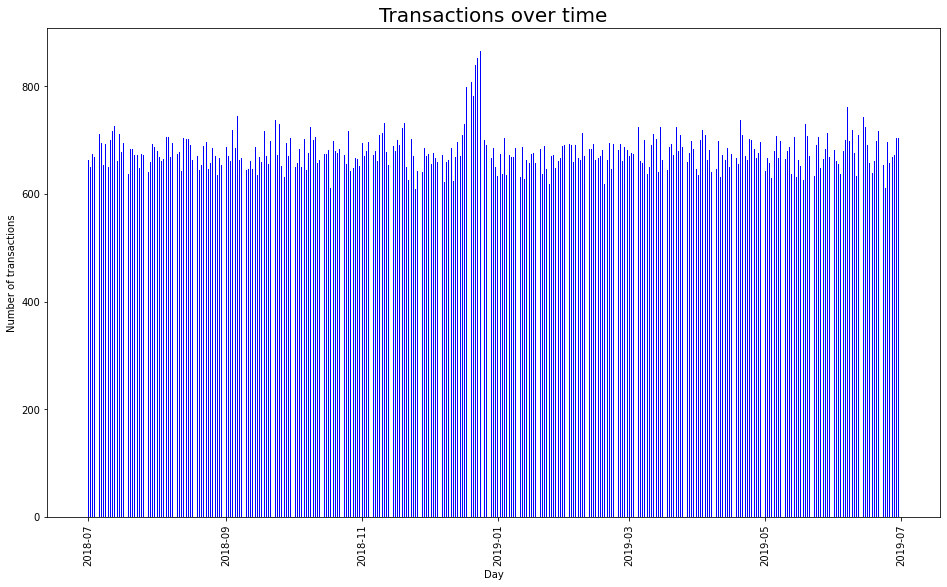

In [18]:
plt.figure(figsize=(16,9))
plt.xticks(rotation='vertical')
plt.title('Transactions over time', fontdict={'fontsize': 20})
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.bar(merged_txn_count.DATE, merged_txn_count.TXN_COUNT, width=0.4, color='b');

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

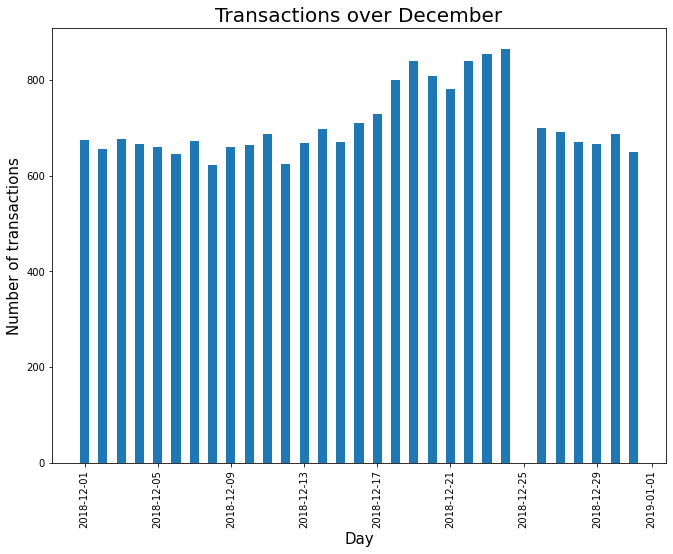

In [19]:
december_data = merged_txn_count.loc[range(153, 184)]
plt.figure(figsize=(11,8))
plt.xticks(rotation='vertical')
plt.title('Transactions over December', fontdict={'fontsize': 20})
plt.xlabel('Day', fontdict={'fontsize': 15})
plt.ylabel('Number of transactions', fontdict={'fontsize': 15})
plt.bar(december_data.DATE, december_data.TXN_COUNT, width=0.5);

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME. We will start with pack size

In [20]:
transaction_data['PACKET_SIZE'] = transaction_data.PROD_NAME.apply(lambda x: int(re.search(r'\d+', x).group()))
transaction_data.sort_values(by='PACKET_SIZE')

c:\Users\TUHIN MITRA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE
40783,2018-09-25,97,97067,96696,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70
42461,2019-05-05,110,110030,111890,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70
176183,2018-12-30,82,82183,81660,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70
227309,2018-12-03,236,236091,239098,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70
42418,2018-11-05,109,109217,111470,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70
...,...,...,...,...,...,...,...,...,...
192034,2019-03-12,100,100121,99145,4,Dorito Corn Chp Supreme 380g,2,13.0,380
255797,2019-01-19,235,235098,238018,4,Dorito Corn Chp Supreme 380g,2,13.0,380
233814,2019-01-24,151,151102,149810,4,Dorito Corn Chp Supreme 380g,1,6.5,380
131573,2018-07-09,213,213087,212416,4,Dorito Corn Chp Supreme 380g,2,13.0,380


The largest size is 380g and the smallest size is 70g - seems sensible!

Let's plot a histogram of PACK_SIZE since we know that it is a categorical variable and not a continuous variable even though it is numeric

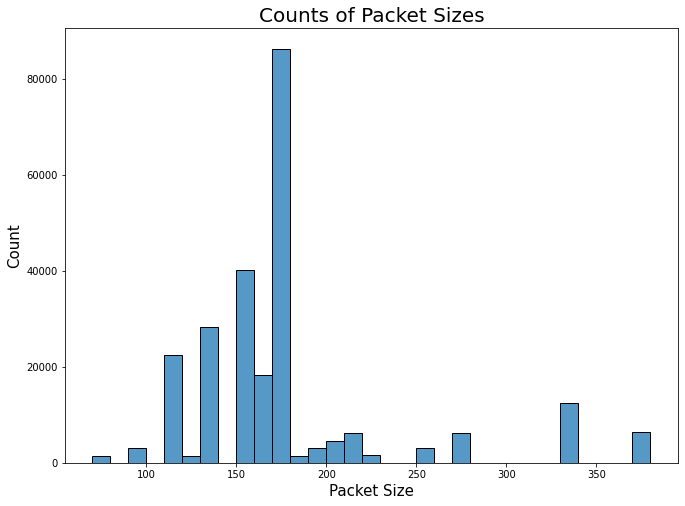

In [21]:
plt.figure(figsize=(11,8))
plt.title('Counts of Packet Sizes', fontdict={'fontsize': 20})
plt.xlabel('Packet Size', fontdict={'fontsize': 15})
plt.ylabel('Count', fontdict={'fontsize': 15})
sns.histplot(data=transaction_data, x='PACKET_SIZE', binwidth = 10);

Pack sizes created look reasonable.

Now to create brands, we can use the first word in PROD_NAME to work out the brand name.

In [22]:
transaction_data['BRAND'] = transaction_data.PROD_NAME.apply(lambda x: x.split()[0])
transaction_data

c:\Users\TUHIN MITRA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


In [23]:
transaction_data.BRAND.unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. Let's combine these together and also add their full name. We'll also do the same for others where its required.

In [24]:
transaction_data.loc[transaction_data.BRAND == 'Natural', 'BRAND'] = 'Natural Chip Company'
transaction_data.loc[transaction_data.BRAND == 'NCC', 'BRAND'] = 'Natural Chip Company'
transaction_data.loc[transaction_data.BRAND == 'Old', 'BRAND'] = 'Old El Paso'
transaction_data.loc[transaction_data.BRAND == 'Burger', 'BRAND'] = 'Burger Rings'
transaction_data.loc[transaction_data.BRAND == 'Red', 'BRAND'] = 'Red Rock Deli'
transaction_data.loc[transaction_data.BRAND == 'RRD', 'BRAND'] = 'Red Rock Deli'
transaction_data.loc[transaction_data.BRAND == 'Grain', 'BRAND'] = 'Grain Waves'
transaction_data.loc[transaction_data.BRAND == 'Dorito', 'BRAND'] = 'Doritos'
transaction_data.loc[transaction_data.BRAND == 'Smith', 'BRAND'] = 'Smiths'
transaction_data.loc[transaction_data.BRAND == 'GrnWves', 'BRAND'] = 'Grain Waves'
transaction_data.loc[transaction_data.BRAND == 'Infzns', 'BRAND'] = 'Infuzions'
transaction_data.loc[transaction_data.BRAND == 'French', 'BRAND'] = 'French Fries'
transaction_data.loc[transaction_data.BRAND == 'Snbts', 'BRAND'] = 'Sunbites'
transaction_data.loc[transaction_data.BRAND == 'WW', 'BRAND'] = 'Woolworths'

c:\Users\TUHIN MITRA\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Now let's create a price column for each product.

In [25]:
transaction_data['PRICE'] = transaction_data.TOT_SALES / transaction_data.PROD_QTY

c:\Users\TUHIN MITRA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Let's reorder the column to our preference.

In [26]:
transaction_data_cleaned = transaction_data[['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'BRAND', 'PACKET_SIZE', 'PROD_QTY', 'PRICE', 'TOT_SALES']]
transaction_data_cleaned

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PACKET_SIZE,PROD_QTY,PRICE,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,Natural Chip Company,175,2,3.00,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,CCs,175,3,2.10,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths,170,2,1.45,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,175,5,3.00,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,150,3,4.60,13.8
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,Kettle,175,2,5.40,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,Tostitos,175,1,4.40,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,Doritos,170,2,4.40,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,Doritos,150,2,3.90,7.8


In [27]:
#total_sales_df = pd.DataFrame(transaction_data_cleaned.groupby('DATE')['TOT_SALES'].sum()).reset_index()
#total_sales_df

Now that we are happy with the transaction dataset, let's have a look at the customer dataset.

## Examining customer data

In [28]:
customer_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [29]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Seems like there are no Null values in the dataset which is great.

In [30]:
customer_data.PREMIUM_CUSTOMER.value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

Premium customers are less in number which is expected.

In [31]:
customer_data.LIFESTAGE.value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

Retirees, older singles/couples and young singles/couples are buying from the supermarket significantly more than the other groups.

## Merging transaction data to customer data

In [32]:
merged_data = pd.merge(left=transaction_data_cleaned, right=customer_data, how='left', on='LYLTY_CARD_NBR')
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PACKET_SIZE,PROD_QTY,PRICE,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,Natural Chip Company,175,2,3.00,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,CCs,175,3,2.10,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths,170,2,1.45,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,175,5,3.00,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,150,3,4.60,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,Kettle,175,2,5.40,10.8,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,Tostitos,175,1,4.40,4.4,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,Doritos,170,2,4.40,8.8,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,Doritos,150,2,3.90,7.8,YOUNG SINGLES/COUPLES,Premium


As the number of rows in `merged_data` is the same as that of `transaction_data`, we can be sure that no duplicates were created. This is because we created `merge_data` by setting `how='left'` (in other words, a left join) which means take all the rows in `transaction_data` and find rows with matching values in shared columns and then joining the details in these rows to the `LYLTY_CARD_NBR` or the first mentioned table.


Let's also check if some customers were not matched on by checking for nulls.

In [33]:
merged_data.LYLTY_CARD_NBR.count()

246740

Great, there are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset.

Data exploration is now complete!

In [34]:
#merged_data.to_csv('merged_data.csv', index=False)

## Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips


Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe which customer segment contribute most to chip sales.

In [35]:
sales_data = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().to_frame().reset_index()
sales_data

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


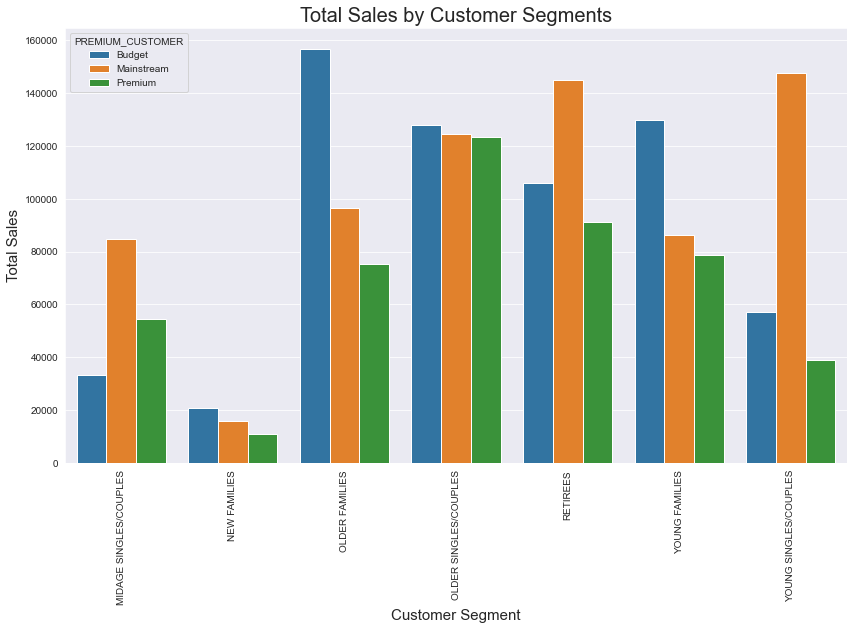

In [36]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=sales_data, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
ax.set_xlabel('Customer Segment', fontsize=15) 
ax.set_ylabel('Total Sales', fontsize=15)
ax.set_title('Total Sales by Customer Segments', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees.

Let's see if the higher sales are due to there being more customers who buy chips.

In [37]:
sales_data_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().to_frame().reset_index()
sales_data_customer

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,4691
1,MIDAGE SINGLES/COUPLES,Mainstream,11095
2,MIDAGE SINGLES/COUPLES,Premium,7612
3,NEW FAMILIES,Budget,2824
4,NEW FAMILIES,Mainstream,2185
5,NEW FAMILIES,Premium,1488
6,OLDER FAMILIES,Budget,21514
7,OLDER FAMILIES,Mainstream,13241
8,OLDER FAMILIES,Premium,10403
9,OLDER SINGLES/COUPLES,Budget,17172


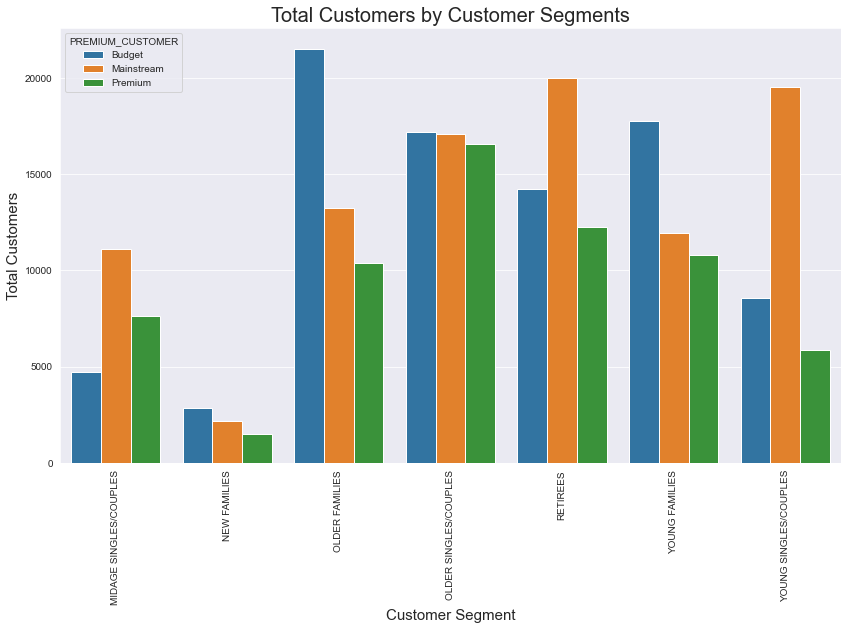

In [38]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=sales_data_customer, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER')
ax.set_xlabel('Customer Segment', fontsize=15) 
ax.set_ylabel('Total Customers', fontsize=15)
ax.set_title('Total Customers by Customer Segments', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.


In [39]:
sales_data_avg = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().to_frame().reset_index()
sales_data_avg

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,1.893626
1,MIDAGE SINGLES/COUPLES,Mainstream,1.911942
2,MIDAGE SINGLES/COUPLES,Premium,1.891750
3,NEW FAMILIES,Budget,1.855878
4,NEW FAMILIES,Mainstream,1.858124
5,NEW FAMILIES,Premium,1.860887
6,OLDER FAMILIES,Budget,1.945384
7,OLDER FAMILIES,Mainstream,1.948795
8,OLDER FAMILIES,Premium,1.945496
9,OLDER SINGLES/COUPLES,Budget,1.914920


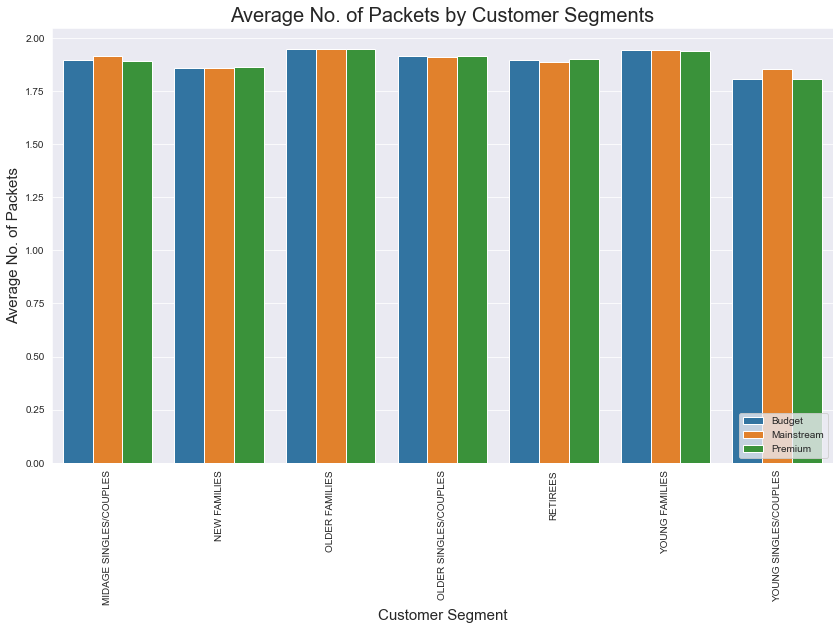

In [40]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=sales_data_avg, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')
ax.set_xlabel('Customer Segment', fontsize=15) 
ax.set_ylabel('Average No. of Packets', fontsize=15)
ax.set_title('Average No. of Packets by Customer Segments', fontsize=20)
plt.legend(loc='lower right')
plt.xticks(rotation='vertical')
plt.show()

Older families and young families in general buy more chips per customer.

Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [41]:
sales_data_avg_price = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE'].mean().to_frame().reset_index()
sales_data_avg_price

,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,MIDAGE SINGLES/COUPLES,Budget,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,3.770698
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
5,NEW FAMILIES,Premium,3.872110
6,OLDER FAMILIES,Budget,3.745340
7,OLDER FAMILIES,Mainstream,3.737077
8,OLDER FAMILIES,Premium,3.717000
9,OLDER SINGLES/COUPLES,Budget,3.882096


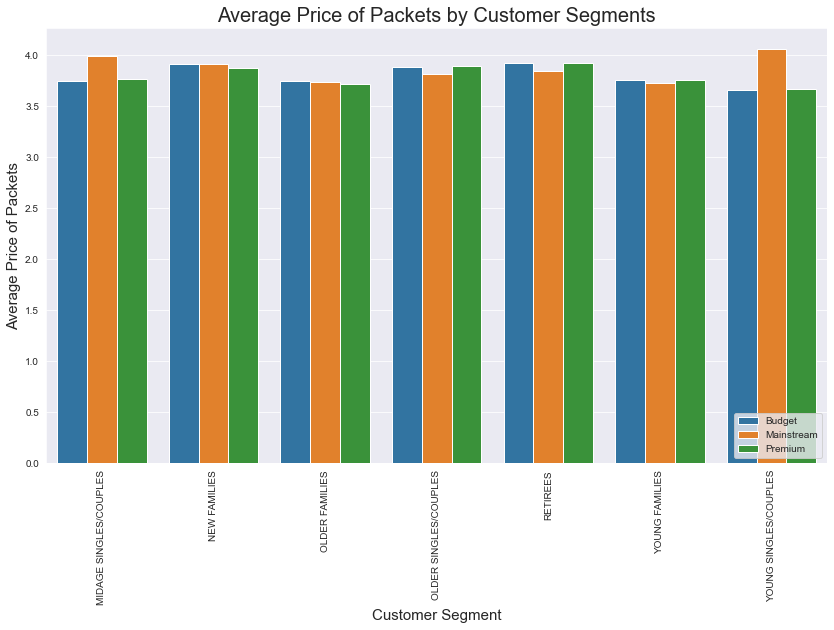

In [42]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=sales_data_avg_price, x='LIFESTAGE', y='PRICE', hue='PREMIUM_CUSTOMER')
ax.set_xlabel('Customer Segment', fontsize=15) 
ax.set_ylabel('Average Price of Packets', fontsize=15)
ax.set_title('Average Price of Packets by Customer Segments', fontsize=20)
plt.legend(loc='lower right')
plt.xticks(rotation='vertical')
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [43]:
print(stats.ttest_ind(merged_data.loc[(merged_data.LIFESTAGE.isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) & (merged_data.PREMIUM_CUSTOMER == 'Mainstream')].PRICE,
                      merged_data.loc[(merged_data.LIFESTAGE.isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])) & (merged_data.PREMIUM_CUSTOMER.isin(['Budget', 'Premium']))].PRICE),
stats.t.ppf(q=0.025, df=57365),
stats.t.ppf(q=0.975, df=57365))

Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309) -1.960005339380698 1.9600053393806975


The t-test results in a p-value of 2.235645611549355e-309, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

## Deep dive into specific customer segments for insights

We have found quite a few interesting insights that we can dive deeper into.

We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

In [44]:
# mainstream_young_sin_coup = merged_data.loc[(merged_data.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (merged_data.PREMIUM_CUSTOMER == 'Mainstream')]
# mainstream_young_sin_coup_brand = mainstream_young_sin_coup.groupby('BRAND')['LYLTY_CARD_NBR'].count().to_frame().reset_index().sort_values(by='LYLTY_CARD_NBR', ascending=False)
# mainstream_young_sin_coup_brand.rename(columns={'LYLTY_CARD_NBR': 'CUSTOMER COUNT'}, inplace=True)

In [45]:
# plt.figure(figsize=(16,9))
# ax = sns.barplot(data=mainstream_young_sin_coup_brand, x='BRAND', y='CUSTOMER COUNT')
# ax.set_xlabel('Product Name', fontsize=20) 
# ax.set_ylabel('No. of Customers', fontsize=20, labelpad=15)
# ax.set_title('No. of Customers by Brand', fontsize=25, pad=15)
# plt.xticks(rotation=70, fontsize=13)
# plt.yticks(fontsize=15)
# plt.show()

In [46]:
# mainstream_young_sin_coup_pack = mainstream_young_sin_coup.groupby('PACKET_SIZE')['LYLTY_CARD_NBR'].count().to_frame().reset_index().sort_values(by='LYLTY_CARD_NBR', ascending=False)
# mainstream_young_sin_coup_pack.rename(columns={'LYLTY_CARD_NBR': 'CUSTOMER COUNT'}, inplace=True)

In [47]:
# plt.figure(figsize=(16,9))
# ax = sns.barplot(data=mainstream_young_sin_coup_pack, x='PACKET_SIZE', y='CUSTOMER COUNT')
# ax.set_xlabel('Product Name', fontsize=20, labelpad=15) 
# ax.set_ylabel('Packet Size', fontsize=20, labelpad=15)
# ax.set_title('No. of Customers by Packet Size', fontsize=25, pad=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()

### Preferred brand compared to the rest of the population

In [48]:
cust_seg_brand = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND'])['TOT_SALES'].sum().to_frame().reset_index()
cust_seg_brand

,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,Burger Rings,193.2
1,MIDAGE SINGLES/COUPLES,Budget,CCs,430.5
2,MIDAGE SINGLES/COUPLES,Budget,Cheetos,337.6
3,MIDAGE SINGLES/COUPLES,Budget,Cheezels,612.3
4,MIDAGE SINGLES/COUPLES,Budget,Cobs,1311.0
...,...,...,...,...
415,YOUNG SINGLES/COUPLES,Premium,Thins,2026.2
416,YOUNG SINGLES/COUPLES,Premium,Tostitos,1698.4
417,YOUNG SINGLES/COUPLES,Premium,Twisties,1619.0
418,YOUNG SINGLES/COUPLES,Premium,Tyrrells,991.2


In [49]:
max_cust_brand = cust_seg_brand.groupby('BRAND')['TOT_SALES'].max()
pop_seg_brand = cust_seg_brand.loc[cust_seg_brand['TOT_SALES'].isin(max_cust_brand)].sort_values(by='TOT_SALES', ascending=False).drop_duplicates(subset='BRAND')
pop_seg_brand.loc[(pop_seg_brand.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (pop_seg_brand.PREMIUM_CUSTOMER == 'Mainstream')]
#pop_seg_brand

,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,TOT_SALES
389,YOUNG SINGLES/COUPLES,Mainstream,Kettle,35423.6
385,YOUNG SINGLES/COUPLES,Mainstream,Doritos,20925.9
391,YOUNG SINGLES/COUPLES,Mainstream,Pringles,16006.2
388,YOUNG SINGLES/COUPLES,Mainstream,Infuzions,8749.4
397,YOUNG SINGLES/COUPLES,Mainstream,Twisties,7539.8
396,YOUNG SINGLES/COUPLES,Mainstream,Tostitos,7238.0
384,YOUNG SINGLES/COUPLES,Mainstream,Cobs,6144.6
398,YOUNG SINGLES/COUPLES,Mainstream,Tyrrells,4800.6


These are the brands that the mainstream young singles and couples dominate over other population. This group should be targeted to retain them and to increase sales further.

### Preferred pack size compared to the rest of the population

In [50]:
cust_seg_pack = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PACKET_SIZE'])['TOT_SALES'].sum().to_frame().reset_index()
cust_seg_pack

,LIFESTAGE,PREMIUM_CUSTOMER,PACKET_SIZE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,70,122.4
1,MIDAGE SINGLES/COUPLES,Budget,90,222.7
2,MIDAGE SINGLES/COUPLES,Budget,110,3146.4
3,MIDAGE SINGLES/COUPLES,Budget,125,105.0
4,MIDAGE SINGLES/COUPLES,Budget,134,3159.8
...,...,...,...,...
415,YOUNG SINGLES/COUPLES,Premium,220,234.6
416,YOUNG SINGLES/COUPLES,Premium,250,464.4
417,YOUNG SINGLES/COUPLES,Premium,270,1154.6
418,YOUNG SINGLES/COUPLES,Premium,330,2627.7


In [51]:
max_cust_pack = cust_seg_pack.groupby('PACKET_SIZE')['TOT_SALES'].max()
pop_seg_pack = cust_seg_pack.loc[cust_seg_pack['TOT_SALES'].isin(max_cust_pack)].sort_values(by='TOT_SALES', ascending=False).drop_duplicates(subset='PACKET_SIZE')
pop_seg_pack.loc[(pop_seg_pack.LIFESTAGE == 'YOUNG SINGLES/COUPLES') & (pop_seg_pack.PREMIUM_CUSTOMER == 'Mainstream')]

,LIFESTAGE,PREMIUM_CUSTOMER,PACKET_SIZE,TOT_SALES
384,YOUNG SINGLES/COUPLES,Mainstream,134,16006.2
382,YOUNG SINGLES/COUPLES,Mainstream,110,14630.0
398,YOUNG SINGLES/COUPLES,Mainstream,330,12654.0
399,YOUNG SINGLES/COUPLES,Mainstream,380,7175.9
397,YOUNG SINGLES/COUPLES,Mainstream,270,5303.8
394,YOUNG SINGLES/COUPLES,Mainstream,210,3798.0


The mainstream young singles and couples seem to buy more of the larger packet of chips over other population.